<img src="images/tennisballbounce1.jpg" alt="Drawing" style="width: 600px;"/><img src="images/rafashot.jpg" alt="Drawing" style="width: 492px;"/>

## ATP Match Study: How ATP Players Win Matches

[Write intro here]
Like most sports, tennis is replete with statistics. Some are interesting for spectators; others useful for players coaches. Some may be only for tennis geeks or trivia enthusiasts. For this project, I wanted to see if I could find any match specific statistics that could potentially differentiate between tennis match winners and losers. Is there one thing, or perhaps a few things, that players and coaches could use to improve their chances to win more matches.

In [1]:
import pandas as pd, csv, matplotlib.pyplot as plt, numpy as np, seaborn as sns, sklearn as sk
from sqlalchemy import create_engine

### The Stats We Measured

Here's how I performed this study.

I took data from 88,249 matches from ATP tournaments from 1991 to 2016 and divided it into two categories: 1) match winner and 2) match loser.

For each match, I collected 17 stats per player:

 -  \# of aces
 -  \# of double faults
 -  \# of first serves in
 -  total # of first serves
 -  \# of first serve points won
 -  total # of first serve points
 -  \# of second points won
 -  total # of second serve points
 -  \# of service points won
 -  total # of service points
 -  \# of first serve return points won
 -  total # of first serve return points
 -  \# of second serve return points won
 -  total # of second serve return points
 -  total # of points won
 -  total # of service games
 -  total # of return games
 -  total # of points won
 
 Additionally, I calculated six additional match statistics for each player. The reason for creating these additional statistics is to allow for relative comparisons, since the winners statistics from a raw values perspective is much different between 6-0, 6-0 match and a 7-6, 6-7, 7-6, 6-7, 7-6 match. 
 
 -  ace percentage
 -  double fault percentage
 -  service points won percentage
 -  return points won percentage
 -  break points won percentage
 -  total points won percentage

Lastly, I calculated the difference between the winners' and losers percentages for each of these six statistics plus the rank difference between the winner and loser.

There are several more statistics that I would have liked to have had. Perhaps on the next project. For now, let's take a look at what we've got.

In [2]:
# Import Match Statistics csv file.
statsdf = pd.read_csv('data/matchstats.csv')

In [3]:
statsdf = statsdf.drop(['Unnamed: 0'], axis = 1)

In [4]:
# Set some sensible display options for data investigation
pd.options.display.max_columns = 15
pd.options.display.max_rows = 500

In [5]:
# Define Main Columns for different types of data frames
main_cols_stats = ['rank_dif','winner_ace_pct','loser_ace_pct','ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif',
                   'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct','brk_pts_dif', 'winner_points_won_pct',
                   'loser_points_won_pct', 'total_points_pct_dif']
main_cols_winner = ['winner_aces','winner_double_faults','winner_first_serves_in','winner_first_serves_total','winner_first_serve_points_won','winner_first_serve_points_total',
                    'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                    'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                    'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                    'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                    'winner_total_points_total']
main_cols_loser = ['loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total','loser_first_serve_points_won','loser_first_serve_points_total',
                   'loser_second_serve_points_won','loser_second_serve_points_total','loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won',
                   'loser_service_points_total','loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                   'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                   'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total']

In [6]:
statsdf.head()

,match_id,match_duration,winner_aces,winner_double_faults,winner_first_serves_in,winner_first_serves_total,winner_first_serve_points_won,...,ace_dif,df_dif,srv_pts_dif,rtn_pts_dif,brk_pts_dif,rank_dif,total_points_pct_dif
0,1991-7308-k181-l206,80.0,3.0,0.0,0.0,65.0,29.0,...,3.166109,0.000000,9.453735,9.453735,-42.857143,-5.0,8.955224
1,1991-7308-k181-s351,89.0,1.0,2.0,44.0,65.0,31.0,...,-12.919370,-2.947173,10.732159,10.732159,-2.857143,9.0,8.108108
2,1991-7308-k181-s424,55.0,0.0,1.0,17.0,36.0,11.0,...,-3.703704,-0.925926,29.629630,29.629630,3.333333,-11.0,28.888889
3,1991-7308-a031-s331,69.0,2.0,3.0,44.0,58.0,28.0,...,-1.908867,-1.970443,8.559113,8.559113,30.555556,-48.0,8.771930
4,1991-7308-k030-w136,89.0,6.0,3.0,37.0,71.0,25.0,...,2.200704,1.100352,11.971831,11.971831,-16.666667,32.0,12.592593


## First let's look at some overall match statistics.

In [12]:
print('The average match lasts ' + str(round(statsdf['match_duration'].mean(),2)) + ' minutes.')
print('On average, the matches had a total of ' + str(round(statsdf['winner_total_points_total'].mean(),2)) + ' points.')
print('On average, the match had a total of ' + str(round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ) ,2) ) + ' games played.')

The average match lasts 99.66 minutes.
On average, the matches had a total of 157.05 points.
On average, the match had a total of 24.63 games played.


In [21]:
print('The winner won an average of ' + str(round(statsdf['winner_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['winner_total_points_won'].mean(),2)) + ' points.')
print('On average, the loser won ' + str(round(statsdf['loser_points_won_pct'].mean(),2)) + ' percent of the points, or '
      + str(round(statsdf['loser_total_points_won'].mean(),2)) + ' points.')
print('A difference of ' + str(round( ( statsdf['winner_points_won_pct'].mean() - statsdf['loser_points_won_pct'].mean()),2)) + ' percent, or '
      + str(round((statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean()),2)) + ' points.')

The winner won an average of 55.47 percent of the points, or 85.7 points.
On average, the loser won 44.57 percent of the points, or 71.37 points.
A difference of 10.9 percent, or 14.32 points.


In [27]:
total_games_played = round( (statsdf['winner_games_won'].mean() + statsdf['loser_games_won'].mean() ),2)
points_difference = round( (statsdf['winner_total_points_won'].mean() - statsdf['loser_total_points_won'].mean() ),2)
points_per_game_difference = round((points_difference / total_games_played),2)

print('This is only a difference of ' + str(points_per_game_difference) + ' points per game.' )

This is only a difference of 0.58 points per game.


#### Now tennis is a bit different from most other professional sports in a couple of ways. First, players don't just try to 'score points'; they 'compete' for points--for every point played, one player wins that point, and the other players 'loses' the point. Unlike baseball, soccer, football, hockey, etc., where teams/players just try to score points, and the team/player with the most points wins. In other words, in tennis if the score is 1-0 (15-Love), and one player wins the next point, the score would be either 1-1 (15-all) or 2-0 (30-Love).

#### Which leads to the second point. Since the difference is potentially a 2- point swing, and because a player needs to win by 2 points in order to win a game, the seemingly small difference in points won per game per match, could potentially change the outcome of a match if a player could improve certain aspects of their game.

### So let's look at the winner statistics.

In [28]:
statsdf.loc[:,main_cols_winner].describe().T

,count,mean,std,min,25%,50%,75%,max
winner_aces,88249.0,6.237419,5.092993,0.0,3.0,5.0,9.0,113.0
winner_double_faults,88249.0,2.728167,2.340265,0.0,1.0,2.0,4.0,23.0
winner_first_serves_in,88249.0,45.308593,20.234890,0.0,32.0,43.0,56.0,361.0
winner_first_serves_total,88249.0,77.115265,28.302553,22.0,56.0,72.0,93.0,491.0
winner_first_serve_points_won,88249.0,35.211436,13.179096,3.0,26.0,33.0,42.0,292.0
winner_first_serve_points_total,88249.0,46.839704,18.401658,9.0,33.0,43.0,57.0,361.0
winner_second_serve_points_won,88249.0,16.605401,6.800410,0.0,12.0,16.0,20.0,82.0
winner_second_serve_points_total,88249.0,30.275561,13.027984,0.0,21.0,28.0,37.0,130.0
winner_break_points_saved,88249.0,3.368752,3.106680,0.0,1.0,3.0,5.0,24.0
winner_break_points_serve_total,88249.0,5.014153,4.107953,0.0,2.0,4.0,7.0,34.0


### Now let's look at the loser statistics.

In [29]:
statsdf.loc[:,main_cols_loser].describe().T

,count,mean,std,min,25%,50%,75%,max
loser_aces,88249.0,4.617514,4.432620,0.0,2.0,3.0,6.0,103.0
loser_double_faults,88249.0,3.513298,2.595608,0.0,2.0,3.0,5.0,26.0
loser_first_serves_in,88249.0,47.234360,18.554117,7.0,34.0,44.0,57.0,328.0
loser_first_serves_total,88249.0,79.928872,28.132924,27.0,59.0,74.0,95.0,489.0
loser_first_serve_points_won,88249.0,31.228377,13.861930,1.0,21.0,29.0,39.0,284.0
loser_first_serve_points_total,88249.0,47.234360,18.554117,7.0,34.0,44.0,57.0,328.0
loser_second_serve_points_won,88249.0,14.839364,7.045357,0.0,10.0,14.0,19.0,101.0
loser_second_serve_points_total,88249.0,32.694512,12.971264,0.0,23.0,30.0,40.0,161.0
loser_break_points_saved,88249.0,4.786298,3.224498,-6.0,2.0,4.0,7.0,28.0
loser_break_points_serve_total,88249.0,8.738943,4.023520,0.0,6.0,8.0,11.0,35.0


### What about the statistical categories we created to compare the differences between winner and loser.

In [30]:
statsdf.loc[:,main_cols_stats].describe().T

,count,mean,std,min,25%,50%,75%,max
rank_dif,88249.0,-52.054040,195.183544,-2126.000000,-75.000000,-24.000000,19.000000,1777.000000
winner_ace_pct,88249.0,8.341499,6.336801,0.000000,3.680982,6.976744,11.538462,56.756757
loser_ace_pct,88249.0,5.599407,4.661784,0.000000,2.127660,4.587156,7.865169,40.000000
ace_dif,88249.0,2.742093,7.339802,-31.668052,-1.708619,2.086721,6.666667,55.002371
winner_df_pct,88249.0,3.471345,2.647700,0.000000,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88249.0,4.511474,3.174937,0.000000,2.150538,4.000000,6.250000,35.416667
df_dif,88249.0,-1.040129,3.907797,-35.416667,-3.340081,-0.891862,1.458059,18.987342
winner_srv_pts_pct,88249.0,68.224091,6.719319,19.696970,63.529412,67.857143,72.580645,100.000000
loser_srv_pts_pct,88249.0,56.694536,7.437428,14.285714,52.054795,57.031250,61.682243,85.185185
srv_pts_dif,88249.0,11.529555,9.119715,-39.393939,5.032468,10.270270,16.767984,68.292683


### So it looks like the winner did better in every category, although some of the differences (aces and double faults) are relatively small. Note that For double faults, 'df_dif', is negative, which means the winner had fewer double faults than the loser, which is better.)

### Let's visually examine the differences between the winners' and losers' statistics in the other five categories I created. (We looked at total points won percentage already.)

### Ace Percentage

In [45]:
# Pre-format DataFrame
ace_stats_df = statsdf.drop(['match_id', 'match_duration', 'winner_break_points_return_total', 'loser_break_points_return_total', 'winner_player_id', 'rank_dif',
                             'ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif','winner_sets_won',
                             'winner_games_won', 'winner_tiebreaks_won', 'winner_rank_number', 'winner_ranking_points', 'loser_player_id', 'loser_games_won',
                             'loser_tiebreaks_won', 'BeginWeek_y', 'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct',
                             'match_score_tiebreaks_y', 'loser_sets_won', 'loser_rank_number', 'loser_ranking_points',
                             'brk_pts_dif', 'winner_points_won_pct', 'loser_points_won_pct', 'total_points_pct_dif', 'winner_aces','winner_double_faults',
                             'winner_first_serves_in','winner_first_serves_total', 'winner_first_serve_points_won','winner_first_serve_points_total',
                             'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                             'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                             'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                             'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                             'winner_total_points_total', 'loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total',
                             'loser_first_serve_points_won','loser_first_serve_points_total', 'loser_second_serve_points_won','loser_second_serve_points_total',
                             'loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won', 'loser_service_points_total',
                             'loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                             'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                             'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total'], axis=1)
ace_stats_df.head()
ace_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
winner_ace_pct,88249.0,8.341499,6.336801,0.0,3.680982,6.976744,11.538462,56.756757
loser_ace_pct,88249.0,5.599407,4.661784,0.0,2.127660,4.587156,7.865169,40.000000


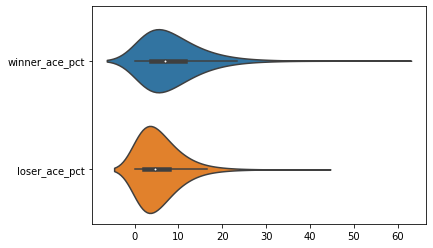

In [47]:
sns.violinplot(data = ace_stats_df, orient="h", bw=0.5)

### Double Fault Percentage

In [43]:
# Pre-format DataFrame
doublefault_stats_df = statsdf.drop(['match_id', 'match_duration', 'winner_break_points_return_total', 'loser_break_points_return_total', 'winner_player_id', 'rank_dif',
                             'ace_dif','winner_ace_pct','loser_ace_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif','winner_sets_won',
                             'winner_games_won', 'winner_tiebreaks_won', 'winner_rank_number', 'winner_ranking_points', 'loser_player_id', 'loser_games_won',
                             'loser_tiebreaks_won', 'BeginWeek_y', 'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct',
                             'match_score_tiebreaks_y', 'loser_sets_won', 'loser_rank_number', 'loser_ranking_points',
                             'brk_pts_dif', 'winner_points_won_pct', 'loser_points_won_pct', 'total_points_pct_dif', 'winner_aces','winner_double_faults',
                             'winner_first_serves_in','winner_first_serves_total', 'winner_first_serve_points_won','winner_first_serve_points_total',
                             'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                             'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                             'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                             'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                             'winner_total_points_total', 'loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total',
                             'loser_first_serve_points_won','loser_first_serve_points_total', 'loser_second_serve_points_won','loser_second_serve_points_total',
                             'loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won', 'loser_service_points_total',
                             'loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                             'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                             'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total'], axis=1)
doublefault_stats_df.head()
doublefault_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
winner_df_pct,88249.0,3.471345,2.647700,0.0,1.612903,3.076923,4.938272,26.027397
loser_df_pct,88249.0,4.511474,3.174937,0.0,2.150538,4.000000,6.250000,35.416667


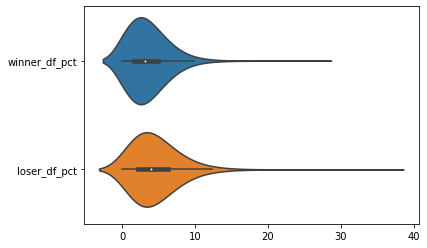

In [44]:
sns.violinplot(data = doublefault_stats_df, bw=0.5, orient="h")

### Service Points Won Percentage

In [48]:
# Pre-format DataFrame
servicepoints_stats_df = statsdf.drop(['match_id', 'match_duration', 'winner_break_points_return_total', 'loser_break_points_return_total', 'winner_player_id', 'rank_dif',
                             'ace_dif','winner_ace_pct','loser_ace_pct','df_dif','winner_df_pct','loser_df_pct','srv_pts_dif','winner_sets_won',
                             'winner_games_won', 'winner_tiebreaks_won', 'winner_rank_number', 'winner_ranking_points', 'loser_player_id', 'loser_games_won',
                             'loser_tiebreaks_won', 'BeginWeek_y', 'winner_rtn_pts_pct','loser_rtn_pts_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct',
                             'match_score_tiebreaks_y', 'loser_sets_won', 'loser_rank_number', 'loser_ranking_points',
                             'brk_pts_dif', 'winner_points_won_pct', 'loser_points_won_pct', 'total_points_pct_dif', 'winner_aces','winner_double_faults',
                             'winner_first_serves_in','winner_first_serves_total', 'winner_first_serve_points_won','winner_first_serve_points_total',
                             'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                             'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                             'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                             'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                             'winner_total_points_total', 'loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total',
                             'loser_first_serve_points_won','loser_first_serve_points_total', 'loser_second_serve_points_won','loser_second_serve_points_total',
                             'loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won', 'loser_service_points_total',
                             'loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                             'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                             'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total'], axis=1)
servicepoints_stats_df.head()
servicepoints_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
winner_srv_pts_pct,88249.0,68.224091,6.719319,19.696970,63.529412,67.857143,72.580645,100.000000
loser_srv_pts_pct,88249.0,56.694536,7.437428,14.285714,52.054795,57.031250,61.682243,85.185185


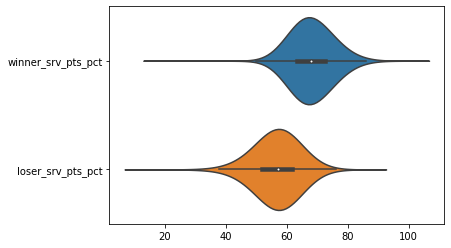

In [49]:
sns.violinplot(data = servicepoints_stats_df, bw=0.5, orient="h")

### Return Points Won Percentage

In [51]:
# Pre-format DataFrame
returnpoints_df = statsdf.drop(['match_id', 'match_duration', 'winner_break_points_return_total', 'loser_break_points_return_total', 'winner_player_id', 'rank_dif',
                             'ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif','winner_sets_won',
                             'winner_games_won', 'winner_tiebreaks_won', 'winner_rank_number', 'winner_ranking_points', 'loser_player_id', 'loser_games_won',
                             'loser_tiebreaks_won', 'BeginWeek_y', 'winner_ace_pct','loser_ace_pct','rtn_pts_dif','winner_brk_pts_pct','loser_brk_pts_pct',
                             'match_score_tiebreaks_y', 'loser_sets_won', 'loser_rank_number', 'loser_ranking_points',
                             'brk_pts_dif', 'winner_points_won_pct', 'loser_points_won_pct', 'total_points_pct_dif', 'winner_aces','winner_double_faults',
                             'winner_first_serves_in','winner_first_serves_total', 'winner_first_serve_points_won','winner_first_serve_points_total',
                             'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                             'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                             'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                             'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                             'winner_total_points_total', 'loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total',
                             'loser_first_serve_points_won','loser_first_serve_points_total', 'loser_second_serve_points_won','loser_second_serve_points_total',
                             'loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won', 'loser_service_points_total',
                             'loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                             'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                             'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total'], axis=1)
returnpoints_df.head()
returnpoints_df.describe().T

,count,mean,std,min,25%,50%,75%,max
winner_rtn_pts_pct,88249.0,43.319326,7.449543,14.814815,38.317757,42.982456,47.959184,85.714286
loser_rtn_pts_pct,88249.0,31.800988,6.894913,0.000000,27.419355,32.142857,36.486486,79.166667


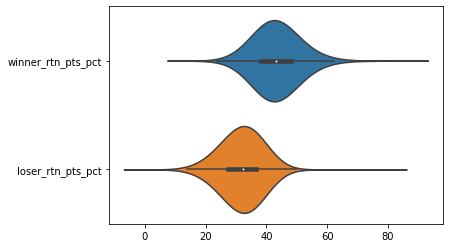

In [53]:
sns.violinplot(data = returnpoints_df, bw=0.5, orient="h")

### Break Points Won Percentage

In [56]:
# Pre-format DataFrame
breakpoints_stats_df = statsdf.drop(['match_id', 'match_duration', 'winner_break_points_return_total', 'loser_break_points_return_total', 'winner_player_id', 'rank_dif',
                             'ace_dif','winner_df_pct','loser_df_pct','df_dif','winner_srv_pts_pct','loser_srv_pts_pct','srv_pts_dif','winner_sets_won',
                             'winner_games_won', 'winner_tiebreaks_won', 'winner_rank_number', 'winner_ranking_points', 'loser_player_id', 'loser_games_won',
                             'loser_tiebreaks_won', 'BeginWeek_y', 'winner_ace_pct','loser_ace_pct','rtn_pts_dif','winner_rtn_pts_pct','loser_rtn_pts_pct',
                             'match_score_tiebreaks_y', 'loser_sets_won', 'loser_rank_number', 'loser_ranking_points',
                             'brk_pts_dif', 'winner_points_won_pct', 'loser_points_won_pct', 'total_points_pct_dif', 'winner_aces','winner_double_faults',
                             'winner_first_serves_in','winner_first_serves_total', 'winner_first_serve_points_won','winner_first_serve_points_total',
                             'winner_second_serve_points_won','winner_second_serve_points_total','winner_break_points_saved','winner_break_points_serve_total',
                             'winner_service_points_won','winner_service_points_total','winner_first_serve_return_won','winner_first_serve_return_total',
                             'winner_second_serve_return_won','winner_second_serve_return_total','winner_break_points_converted','winner_break_points_converted',
                             'winner_service_games_played','winner_return_games_played','winner_return_points_won','winner_return_points_total','winner_total_points_won',
                             'winner_total_points_total', 'loser_aces','loser_double_faults','loser_first_serves_in','loser_first_serves_total',
                             'loser_first_serve_points_won','loser_first_serve_points_total', 'loser_second_serve_points_won','loser_second_serve_points_total',
                             'loser_break_points_saved','loser_break_points_serve_total','loser_service_points_won', 'loser_service_points_total',
                             'loser_first_serve_return_won','loser_first_serve_return_total','loser_second_serve_return_won',
                             'loser_second_serve_return_total','loser_break_points_converted','loser_break_points_converted','loser_service_games_played',
                             'loser_return_games_played','loser_return_points_won','loser_return_points_total','loser_total_points_won','loser_total_points_total'], axis=1)
breakpoints_stats_df.head()
breakpoints_stats_df.describe().T

,count,mean,std,min,25%,50%,75%,max
winner_brk_pts_pct,88249.0,49.539731,19.784274,0.0,36.363636,50.000000,60.0,800.0
loser_brk_pts_pct,88249.0,31.589918,28.106883,0.0,0.000000,28.571429,50.0,400.0


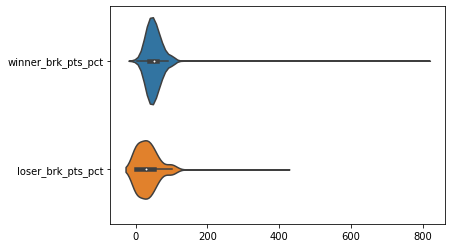

In [57]:
sns.violinplot(data = breakpoint_stats_df, bw=0.5, orient="h")

Working Space Below